In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.stem import WordNetLemmatizer

from bs4 import BeautifulSoup
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

In [2]:
"""
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
"""

"\nnltk.download('stopwords')\nnltk.download('wordnet')\nnltk.download('punkt')\nnltk.download('omw-1.4')\n"

#### Chargement de données

In [3]:
df = pd.read_csv('data\overflowdata.csv')

#### Déxouverte de données

In [4]:
df.shape

(50000, 8)

In [5]:
df.head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"How to wait for all threads to finish, using E...",<p>I need to execute some amount of tasks 4 at...,<java><multithreading><concurrency><parallel-p...,1250643,454,418421,0.0,27
1,How to base64 encode /dev/random or /dev/urandom?,<p><code>cat /dev/urandom</code> is always a f...,<bash><linux><base64><uuencode><random>,1250144,45,55275,0.0,7
2,Cross-browser checking on file size at client ...,<p>Client side validation is important to impr...,<asp.net><validation><file-upload><cross-brows...,1250414,5,6956,NaN,2
3,How to pass a variable from one app domain to ...,"<p>I'd like to know, if I have a variable,for ...",<c#><.net><vb.net><cross-domain><appdomain>,1250676,15,14751,0.0,3
4,Finding points on a line with a given distance,<p>I have a question i know a line i just know...,<language-agnostic><graphics><vector><lines><p...,1250419,25,23994,0.0,5


In [6]:
df.tail()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
49995,Extjs Ajax file download request C# MVC,<p>I want client to download a file stored on ...,<c#><ajax><extjs><get><download>,14235896,6,3876,0.0,2
49996,WebDeploy with MSBuild Not Deploying from Team...,<p>I am trying to use MSDeploy to deploy an MV...,<msbuild><visual-studio-2012><teamcity><msdepl...,14235960,10,11081,0.0,6
49997,Detect release / debug in gulp using Visual St...,<p>I've set up an ASP.NET 5 project in Visual ...,<asp.net><configuration><typescript><gulp><vis...,31712324,36,9054,0.0,8
49998,Index a NumPy array row-wise,<p>Say I have a NumPy array:</p>\n\n<pre><code...,<python><arrays><numpy><optimization><indexing>,48997698,5,1360,0.0,4
49999,Get cookie with react,<p>I need to know if my user is connected or n...,<reactjs><session><cookies><express-session><r...,51109559,83,245819,0.0,8


In [7]:
df.describe()

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,5.000000e+04,50000.000000,5.000000e+04,43065.000000,50000.000000
mean,2.184892e+07,34.642020,3.502015e+04,0.000813,4.335220
std,1.783437e+07,214.428755,1.346047e+05,0.154427,4.048137
min,4.000000e+00,5.000000,5.600000e+01,0.000000,2.000000
25%,8.454510e+06,6.000000,3.638000e+03,0.000000,2.000000
50%,1.780447e+07,10.000000,9.445500e+03,0.000000,3.000000
75%,3.341671e+07,20.000000,2.557250e+04,0.000000,5.000000
max,7.170600e+07,26981.000000,5.990593e+06,32.000000,126.000000


In [8]:
df.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [9]:
df.nunique()

Title            49999
Body             50000
Tags             49090
Id               50000
Score              797
ViewCount        28485
FavoriteCount        3
AnswerCount         63
dtype: int64

In [10]:
df.isnull().sum()

Title               0
Body                0
Tags                0
Id                  0
Score               0
ViewCount           0
FavoriteCount    6935
AnswerCount         0
dtype: int64

In [11]:
df.duplicated(subset="Title").sum()

1

### Définition des fonctions de nettoyage

##### fonction de nettoyage des balises html

In [12]:
# Définir une fonction pour nettoyer le html d'une chaîne
def clean_html(string):
# Créer un objet BeautifulSoup à partir de la chaîne
    soup = BeautifulSoup(string, "html.parser")
    # Extraire le texte de l'objet BeautifulSoup en ignorant les balises
    text = soup.get_text()
    return text

##### Fonction de lemmatization
(Tokenizer les phrases, nettoyage des stopwords et caractères spéciaux, lemmatisation)

In [13]:
# Définir une fonction pour lemmatiser une phrase
def lemmatize_sentence(sentence):

    # Tokeniser la phrase en mots
    words = nltk.word_tokenize(sentence)
    stopwords = nltk.corpus.stopwords.words('english') + ['[', ']', ',', '.', ':', '?', '(', ')']

    words_w_stopwords = [i for i in words if i not in stopwords]

    # Lemmatiser chaque mot et reconstruire la phrase
    wnl = WordNetLemmatizer()
    lemmatized_words = [wnl.lemmatize(word) for word in words_w_stopwords]
    lemmatized_sentence = " ".join(lemmatized_words)

    return lemmatized_sentence

##### Application des fonctions de nettoyage

Nettoyage balises html de la colonne Body

In [14]:
# Appliquer la fonction clean_html à la colonne Body du dataframe
df['Body_cleaned'] = df['Body'].apply(clean_html)

# Afficher le résultat
df['Body_cleaned']

0        I need to execute some amount of tasks 4 at a ...
1        cat /dev/urandom is always a fun way to create...
2        Client side validation is important to improve...
3        I'd like to know, if I have a variable,for exa...
4        I have a question i know a line i just know it...
                               ...                        
49995    I want client to download a file stored on my ...
49996    I am trying to use MSDeploy to deploy an MVC p...
49997    I've set up an ASP.NET 5 project in Visual Stu...
49998    Say I have a NumPy array:\n>>> X = np.array([[...
49999    I need to know if my user is connected or not....
Name: Body_cleaned, Length: 50000, dtype: object

Lemmatization de la colonne Body

In [15]:
# Appliquer la fonction lemmatize_sentence à la colonne body du dataframe
df['Body_lemmatized'] = df['Body_cleaned'].apply(lemmatize_sentence)

# Afficher le résultat
df['Body_lemmatized']


0        I need execute amount task 4 time something li...
1        cat /dev/urandom always fun way create scrolli...
2        Client side validation important improve usabi...
3        I 'd like know I variable example string pas v...
4        I question know line know slope point A x How ...
                               ...                        
49995    I want client download file stored db clicked ...
49996    I trying use MSDeploy deploy MVC project serve...
49997    I 've set ASP.NET 5 project Visual Studio crea...
49998    Say I NumPy array > > > X = np.array 1 2 3 4 5...
49999    I need know user connected For I want read coo...
Name: Body_lemmatized, Length: 50000, dtype: object

Lemmatization de la colonne Title

In [16]:
# Appliquer la fonction à la colonne title du dataframe
df['Title_lemmatized'] = df['Title'].apply(lemmatize_sentence)

# Afficher le résultat
df['Title_lemmatized']

0             How wait thread finish using ExecutorService
1               How base64 encode /dev/random /dev/urandom
2        Cross-browser checking file size client side u...
3                  How pas variable one app domain another
4                        Finding point line given distance
                               ...                        
49995             Extjs Ajax file download request C # MVC
49996             WebDeploy MSBuild Not Deploying TeamCity
49997    Detect release / debug gulp using Visual Studi...
49998                           Index NumPy array row-wise
49999                                     Get cookie react
Name: Title_lemmatized, Length: 50000, dtype: object

Nettoyage de la colonne Tags des balises <>

In [17]:
df['Tags'] = df['Tags'].str.replace('<', '').str.replace('>', ' ')

df['Tags'] = df['Tags'].str.split()

# Afficher le résultat
print(df['Tags'])

0        [java, multithreading, concurrency, parallel-p...
1                  [bash, linux, base64, uuencode, random]
2        [asp.net, validation, file-upload, cross-brows...
3              [c#, .net, vb.net, cross-domain, appdomain]
4        [language-agnostic, graphics, vector, lines, p...
                               ...                        
49995                     [c#, ajax, extjs, get, download]
49996    [msbuild, visual-studio-2012, teamcity, msdepl...
49997    [asp.net, configuration, typescript, gulp, vis...
49998      [python, arrays, numpy, optimization, indexing]
49999    [reactjs, session, cookies, express-session, r...
Name: Tags, Length: 50000, dtype: object


Définition d'un nouveau dataframe avec les deux colonnes Title et Body lemmatizé

In [18]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount', 'Body_cleaned', 'Body_lemmatized', 'Title_lemmatized'],
      dtype='object')

In [20]:
# afficher jusqu'à 100 caractères par colonne
pd.set_option('display.max_colwidth', 100)

# afficher tout le texte sans tronquer
pd.set_option('display.max_colwidth', None)

In [21]:
df.loc[df['Id'] == 1250643,('Tags','Body', 'Body_cleaned', 'Body_lemmatized')]

,Tags,Body,Body_cleaned,Body_lemmatized
0,"[java, multithreading, concurrency, parallel-processing, executorservice]","<p>I need to execute some amount of tasks 4 at a time, something like this:</p>\n\n<pre><code>ExecutorService taskExecutor = Executors.newFixedThreadPool(4);\nwhile(...) {\n taskExecutor.execute(new MyTask());\n}\n//...wait for completion somehow\n</code></pre>\n\n<p>How can I get notified once all of them are complete? For now I can't think about anything better than setting some global task counter and decrease it at the end of every task, then monitor in infinite loop this counter to become 0; or get a list of Futures and in infinite loop monitor isDone for all of them. What are better solutions not involving infinite loops?</p>\n\n<p>Thanks.</p>\n","I need to execute some amount of tasks 4 at a time, something like this:\nExecutorService taskExecutor = Executors.newFixedThreadPool(4);\nwhile(...) {\n taskExecutor.execute(new MyTask());\n}\n//...wait for completion somehow\n\nHow can I get notified once all of them are complete? For now I can't think about anything better than setting some global task counter and decrease it at the end of every task, then monitor in infinite loop this counter to become 0; or get a list of Futures and in infinite loop monitor isDone for all of them. What are better solutions not involving infinite loops?\nThanks.\n",I need execute amount task 4 time something like ExecutorService taskExecutor = Executors.newFixedThreadPool 4 ; ... { taskExecutor.execute new MyTask ; } // ... wait completion somehow How I get notified complete For I ca n't think anything better setting global task counter decrease end every task monitor infinite loop counter become 0 ; get list Futures infinite loop monitor isDone What better solution involving infinite loop Thanks


In [22]:
data = df.drop(['Title','Id', 'Score', 'ViewCount', 'FavoriteCount', 'AnswerCount', 'Body', 'Body_cleaned'], axis=1)

In [23]:
data

,Tags,Body_lemmatized,Title_lemmatized
0,"[java, multithreading, concurrency, parallel-processing, executorservice]",I need execute amount task 4 time something like ExecutorService taskExecutor = Executors.newFixedThreadPool 4 ; ... { taskExecutor.execute new MyTask ; } // ... wait completion somehow How I get notified complete For I ca n't think anything better setting global task counter decrease end every task monitor infinite loop counter become 0 ; get list Futures infinite loop monitor isDone What better solution involving infinite loop Thanks,How wait thread finish using ExecutorService
1,"[bash, linux, base64, uuencode, random]",cat /dev/urandom always fun way create scrolling character display produce many non-printable character Is easy way encode command-line way output readable character base64 uuencode example Note I prefer solution require additional file created,How base64 encode /dev/random /dev/urandom
2,"[asp.net, validation, file-upload, cross-browser, client]",Client side validation important improve usability Is cross-browser way validate file size uploading server I using asp.net file upload control I found third-party control check http //ajaxuploader.com/Demo/simple-upload.aspx http //demo.essentialobjects.com/Default.aspx path=AJAXU How,Cross-browser checking file size client side uploading server
3,"[c#, .net, vb.net, cross-domain, appdomain]",I 'd like know I variable example string pas value new app domain static string _str ; static void Main string args { _str = `` abc '' ; AppDomain domain = AppDomain.CreateDomain `` Domain666 '' ; domain.DoCallBack MyNewAppDomainMethod ; AppDomain.Unload domain ; Console.WriteLine `` Finished '' ; Console.ReadKey ; } static void MyNewAppDomainMethod { Console.WriteLine _str ; //want print `` abc '' } Thanks,How pas variable one app domain another
4,"[language-agnostic, graphics, vector, lines, points]",I question know line know slope point A x How calculate point actually two line distance point A I asking finding intensity pixel line pas A x distance .Distance case number pixel,Finding point line given distance
...,...,...,...
49995,"[c#, ajax, extjs, get, download]",I want client download file stored db clicked button I send ajax request take server side EXTJS downloadFile function b c { var feed_id =this.getMyfeedwindow .down 'form ' .getComponent 'FeedId ' .text ; Ext.Ajax.request { url '/Feed/Download ' method 'GET ' params { fileID feed_id //this.form.getComponent 'file ' .value } failure function response { alert 'failed ! ' ; } success function response { alert 'success ! ' ; } } ; } meet request code block C # public void Download string fileID { Response.ContentType = `` application/force-download '' ; Response.AddHeader `` Content-Disposition '' `` attachment ; Filename=\ '' Logo1.jpg\ '' '' ; Response.BinaryWrite data ; Response.End ; } When I checked network firebug seems request return successfully parameter Cache-Control private Content-Disposition attachment ; filename= '' Logo1.jpg '' Content-Type application/force-download Date Wed 09 Jan 2013 12:51:54 GMT Server Microsoft-IIS/8.0 Transfer-Encoding chunked X-AspNet-Version 4.0.30319 X-AspNetMvc-Version 4.0 X-Powered-By ASP.NET X-SourceFiles = UTF-8 B RTpcVXRrdUNhblxQcm9qZWN0c1xURlNcQlRPTVxCVE9NXEZlZWRcRG93bmxvYWQ= = Although return successful download start I read lot question article answer say adding force-download header solves problem Which point I miss Thanks,Extjs Ajax file download request C # MVC
49996,"[msbuild, visual-studio-2012, teamcity, msdeploy, webdeploy]",I trying use MSDeploy deploy MVC project server using TeamCity When I computer powershell using following command msbuild.exe .\mvc.csproj /p PublishProfile=DevServer /p VisualStudioVersion=11.0 /p DeployOnBuild=True /p Password=MyPassword /p AllowUntrustedCertificate=true It build project deploys server info defined DevServer publish profile perfectly The output show MSDeployPublish section end I see text like Starting Web d

In [24]:
#Renommer les colonnes 
data = data.rename(columns={'Body_lemmatized': 'Body'})
data = data.rename(columns={'Title_lemmatized': 'Title'})

#### Représentation des mots de la colonne Title en WordCloud

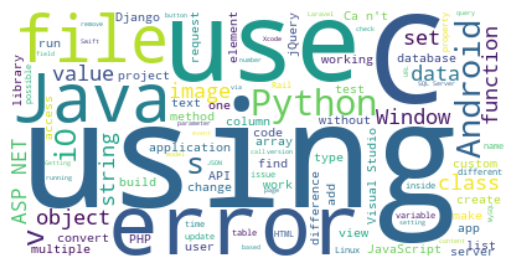

In [25]:
# Extraire la colonne des titres
titles = data['Title']

# Concaténer les titres en une seule chaîne de texte
text = " ".join(title for title in titles)

# Créer un objet WordCloud
wc = WordCloud(background_color="white", max_words=100)

# Générer le nuage de mots à partir du texte
wc.generate(text)

# Afficher le nuage de mots
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

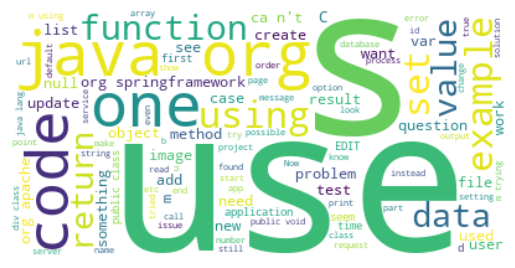

In [26]:
# Extraire la colonne des titres
titles = data['Body']

# Concaténer les titres en une seule chaîne de texte
text = " ".join(title for title in titles)

# Créer un objet WordCloud
wc = WordCloud(background_color="white", max_words=100)

# Générer le nuage de mots à partir du texte
wc.generate(text)

# Afficher le nuage de mots
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
data = data.dropna()

In [28]:
data.to_csv('data\dataframe.csv', encoding='utf-8', index=False, errors='ignore')

### Bag of words

1 - CountVectorizer

In [29]:
# Créer une instance de CountVectorizer
vectorizer = CountVectorizer(lowercase=True,  ngram_range=(1,2), min_df=5, max_df=0.8)

df_train, df_test = train_test_split(data, test_size=0.2)

vectorizer.fit(df_train['Title'])

df_test['quest'] = df_test['Title'] + ' ' + df_test['Body']

# Appliquer le transformeur sur la colonne quest
counts_test_quest = vectorizer.transform(df_test['quest'])


vocab = vectorizer.get_feature_names()

counts = pd.DataFrame(counts_test_quest.toarray(), columns=vocab)



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2 - TfidfVectorizer

In [30]:
tf_vectorizer = TfidfVectorizer(lowercase=True,  ngram_range=(1,2), min_df=5, max_df=0.8)

df_train, df_test = train_test_split(data, test_size=0.2)

tf_vectorizer.fit(df_train['Title'])

# Créer une nouvelle colonne quest qui concatène Title et Body
df_test['quest'] = df_test['Title'] + ' ' + df_test['Body']

# Appliquer le transformeur sur la colonne quest
tdf_counts= tf_vectorizer.transform(df_test['quest'])

tf_vocab = tf_vectorizer.get_feature_names()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# Afficher les scores tf-idf de chaque mot pour chaque document
for i, doc in enumerate(df_test['quest']):
    print(f"Document {i}: {doc}")

for j, word in enumerate(vocab):
    if tdf_counts[i,j] > 0:
        print(f"{word}: {tdf_counts[i,j]:.3f}")
    print()

Document 8887: Why chrome struggle display lot image canvas browser n't We 're working HTML5 canvas displaying lot image one time This working pretty well recently 've problem chrome When drawing image canvas seem reach certain point performance degrades quickly It 's slow effect seems go right 60fps 2-4fps Here 's reproduction code // Helpers // http //developer.mozilla.org/en-US/docs/JavaScript/Reference/Global_Objects/Math/random function getRandomInt min max { return Math.floor Math.random * max - min + 1 + min ; } // http //www.paulirish.com/2011/requestanimationframe-for-smart-animating/ window.requestAnimFrame = function { return window.requestAnimationFrame || window.webkitRequestAnimationFrame || window.mozRequestAnimationFrame || function callback { window.setTimeout callback 1000 / 60 ; } ; } ; // http //github.com/mrdoob/stats.js var Stats = function { var e = Date.now = e ; var n = 0 r = Infinity = 0 ; var = 0 = Infinity u = 0 ; var = 0 f = 0 ; var l = document.createEleme

In [32]:
# afficher la taille du dataframe df_test
print(df_test.shape)

# afficher les premières lignes du dataframe df_test
print(df_test.head())

# afficher la taille de la matrice tdf_counts
print(tdf_counts.shape)

# afficher le nombre de valeurs non nulles dans la matrice tdf_counts
print(tdf_counts.nnz)

(10000, 4)
                                                                                                 Tags   
30312                                                [php, mysql, indexing, duplicates, unique-index]  \
42403                                  [windows, upload, automation, amazon-ec2, amazon-web-services]   
24755                                                     [ios, iphone, ipad, xamarin, xamarin.forms]   
13996                                                           [php, debugging, xampp, wamp, xdebug]   
5046   [android, android-recyclerview, android-room, android-architecture-components, android-paging]   

                                                                                                                                                                                                                                                                                                                                                                      